In [1]:
# Import libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import DataSet of House Prices
data = pd.read_csv('data/train.csv')

# 1 - Exploración de datos

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Eliminar columnas con valores vacios o innecesarios
data = data.drop(['Alley', 'LotFrontage', 'FireplaceQu', 
                  'PoolQC', 'Fence', 'MiscFeature', 
                  'MiscVal', 'LandContour'], axis='columns')

# 2 - Limpieza

In [7]:
# Visualizar los datos
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,12,2008,WD,Normal,250000


# 3 - Análisis

### Correlacion - (Variable principal SalePrice)

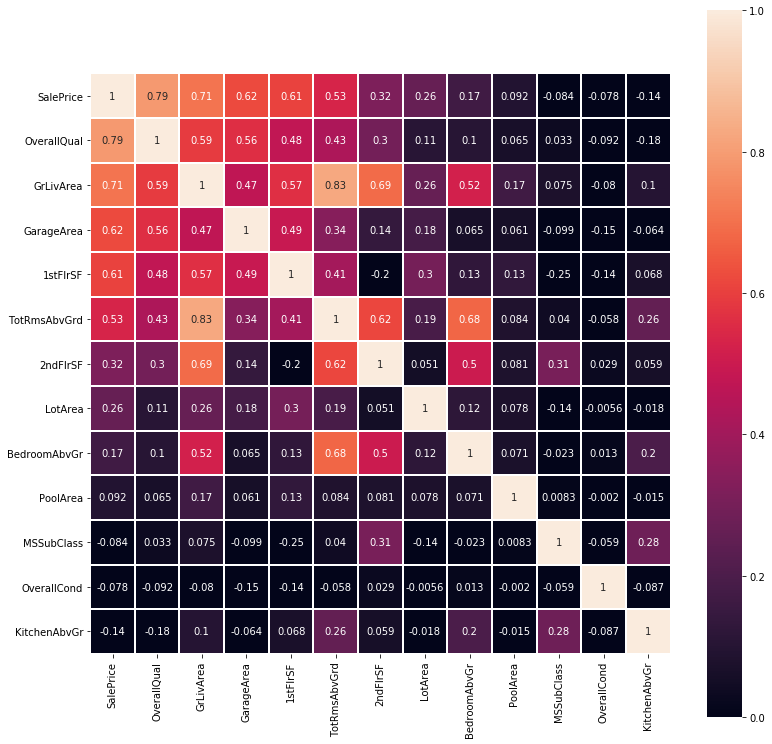

In [90]:
# HeatMap Dataset 
heatmap_price = data[['SalePrice', 'OverallQual', 'GrLivArea', 
                      'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 
                      '2ndFlrSF', 'LotArea', 'BedroomAbvGr', 
                      'PoolArea', 'MSSubClass', 'MSZoning', 
                      'OverallCond', 'KitchenAbvGr']].corr()
# Plotear Dataset
fig, ax = plt.subplots(figsize=(13,13))  
sns.heatmap(heatmap_price, vmin=0, vmax=1, annot=True, linewidths=1, ax=ax, square=True)

Respecto a la variable base "SalePrice" 

**Variables con correlación ALTA:** 
- OverallQual (Calidad de la construcción) - 79%
- GrLivArea (Area habitable) - 71%
- GarageArea (Area de cochera) - 62%
- 1stFlSF (Pies cuadrados habitables en primer piso) - 61%

**Variables con correlación MEDIA o BAJA:**
- TotRmsAbvGrd (Cantidad de habitaciones) - 53%
- 2ndFlrSF (Pies cuadrados habitables en segundo piso) - 32%
- LotArea (Area de terreno) - 26%
- BedroomAbvGr (Cantidad de baños) - 17%

**Variables con correlación MUY BAJA o NEGATIVA:**
- PoolArea (Area de piscina)
- MSSubClass (Clase de construcción)
- OverallCond (Calificación de condición general)
- KitchenAbvGr (Cantidad de cocinas)

***

### Distribución del SalePrice

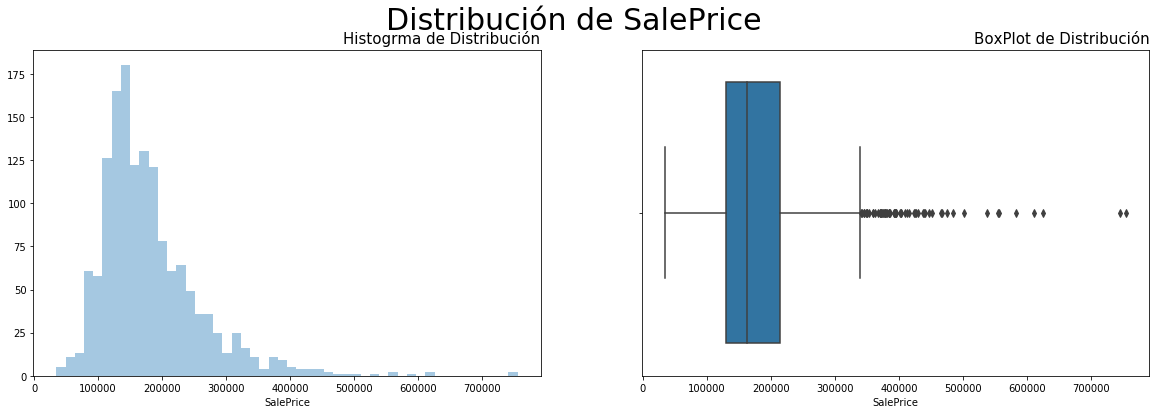

In [68]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de SalePrice', fontsize=30, fontweight=300)

plt.sca(ax1)
#  Dataset and tags:
x1 = data['SalePrice']
ax1.set_title('Histogrma de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.distplot(a=data['SalePrice'], hist=True, kde=False, rug=False, bins=50)


plt.sca(ax2)
#  Dataset and tags:
x2 = data['SalePrice']
ax2.set_title('BoxPlot de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(x2)
plt.show()


La distribución de precios tiene una leve tendencia a la izquierda, observando una tendencia de precios más altos. Así como también una gran cantidad de valores outliers que superan el tercer cuartil.

***

### Media de SalePrice por Neighborhood

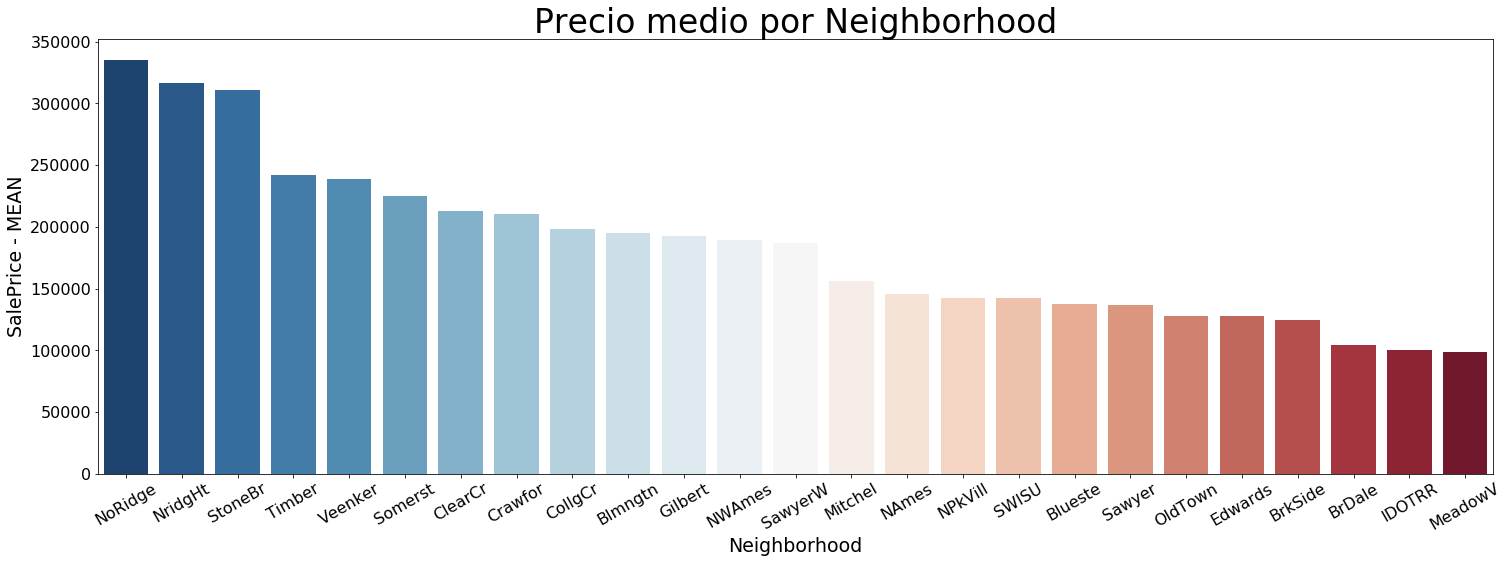

In [108]:
# Calcular Media por Neighborhood
mean_price = data.groupby(['Neighborhood']).SalePrice.agg(['mean', 'count']).reset_index().sort_values(by=['mean'], ascending=False)

# Print BarPlot
plt.figure(figsize=(25, 8))
mean_pn = sns.barplot(x="Neighborhood", y="mean", data=mean_price, palette='RdBu_r')
mean_pn.axes.set_title("Precio medio por Neighborhood",fontsize=33)
mean_pn.set_xlabel("Neighborhood",fontsize=19)
mean_pn.set_ylabel("SalePrice - MEAN",fontsize=19)
mean_pn.tick_params(labelsize=16)
mean_pn.set_xticklabels(mean_pn.get_xticklabels(), rotation=30)
plt.show()

Se aprecia que el top 3 barrios con precios mas elevados son NoRidge, NridgHt y StoneBr.

**La media de los barrios anterior nombrados supera en un 77% la media global del Dataset**
***

### Diagrama de cuartiles entre SalePrice y Neighborhood

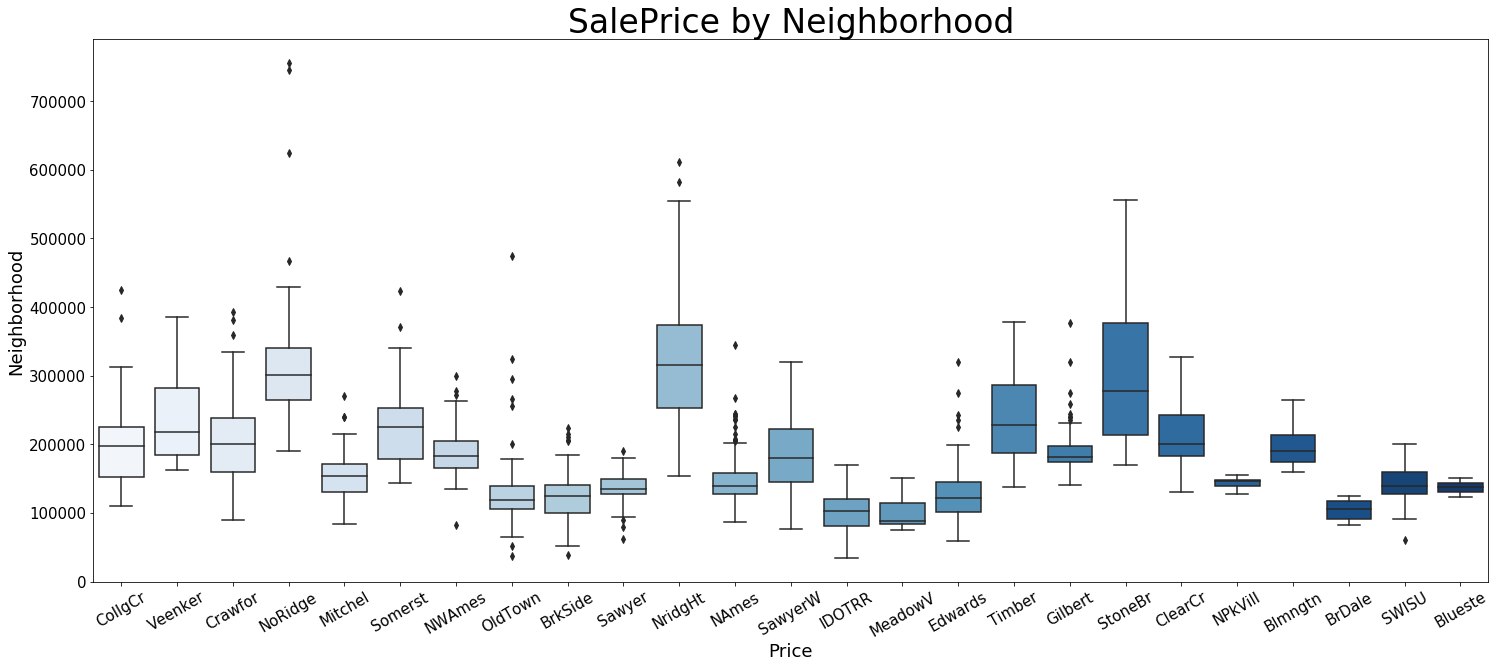

In [110]:
# Price vs Neigborhood
plt.figure(figsize=(25, 10))
pn_box = sns.boxplot( x=data['Neighborhood'], y=data['SalePrice'], palette='Blues')
pn_box.axes.set_title("SalePrice by Neighborhood", fontsize=33)
pn_box.set_xlabel("Price", fontsize=18)
pn_box.set_ylabel("Neighborhood", fontsize=18)
pn_box.tick_params(labelsize=15)
pn_box.set_xticklabels(pn_box.get_xticklabels(), rotation=30)
plt.show()

### Diagrama de cuartiles entre SalePrice y BedroomAbvGr (Cantidad de habitaciones)

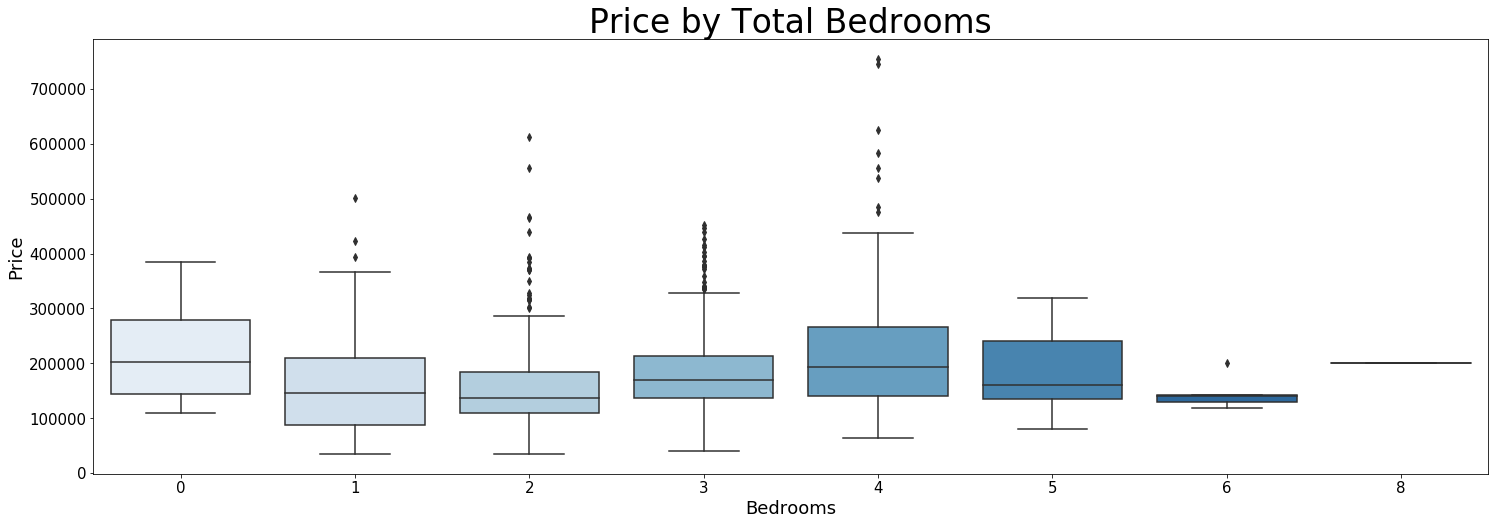

In [111]:
# Price vs Bedrooms
plt.figure(figsize=(25, 8))
bed_box = sns.boxplot( x=data['BedroomAbvGr'], y=data['SalePrice'], palette='Blues')
bed_box.axes.set_title("Price by Total Bedrooms", fontsize=33)
bed_box.set_xlabel("Bedrooms", fontsize=18)
bed_box.set_ylabel("Price", fontsize=18)
bed_box.tick_params(labelsize=15)

plt.show()

### Disprecion sobre las variables con mayor correlación

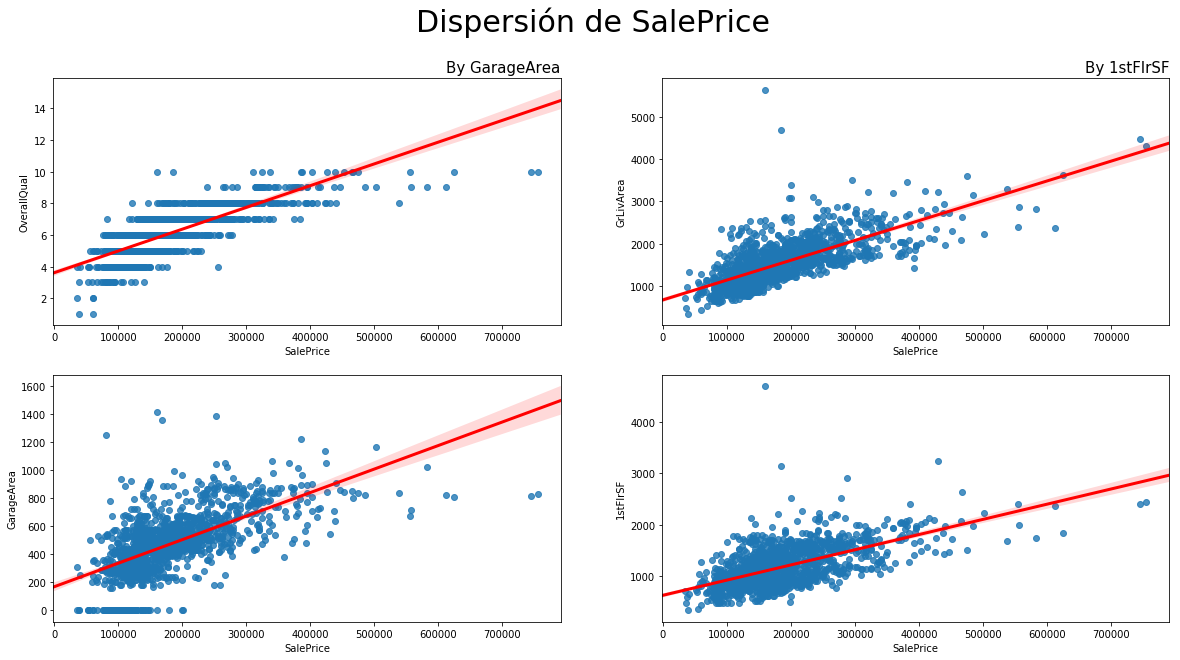

In [127]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Dispersión de SalePrice', fontsize=30, fontweight=300)

# ScatterPlot de OverallQual
plt.sca(ax1)
ax1.set_title('By OverallQual', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.regplot(x=data["SalePrice"], y=data["OverallQual"], line_kws={"color":"r","alpha":1,"lw":3})

# ScatterPlot de GrLivArea
plt.sca(ax2)
ax2.set_title('By GrLivArea', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.regplot(x=data["SalePrice"], y=data["GrLivArea"], line_kws={"color":"r","alpha":1,"lw":3})

# ScatterPlot de GarageArea
plt.sca(ax3)
ax1.set_title('By GarageArea', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.regplot(x=data["SalePrice"], y=data["GarageArea"], line_kws={"color":"r","alpha":1,"lw":3})

# ScatterPlot de 1stFlrSF
plt.sca(ax4)
ax2.set_title('By 1stFlrSF', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.regplot(x=data["SalePrice"], y=data["1stFlrSF"], line_kws={"color":"r","alpha":1,"lw":3})
plt.show()


En general la discreción respecto a la variable base SalePrice con las 4 variables mas correlacionadas demuestran estar fuertemente alineadas. Siendo el GarageArea la variable con mayor discreción respecto al precio de venta.

***

# 4 - Test de Hipótesis

La hipótesis que se desea comprobar es: Si el precio medio del Ft2 del barrio más caro es mayor que el la media del resto de barrios.

In [16]:
# Crear tabla calculando el precio por ft2 por Casa.
data_ft2 = data[['Neighborhood', 'SalePrice', 'GrLivArea']].copy()
data_ft2['SalePrice_Ft2'] = (data['SalePrice'] / data['GrLivArea']).round(2)
data_ft2.head()

,Neighborhood,SalePrice,GrLivArea,SalePrice_Ft2
0,CollgCr,208500,1710,121.93
1,Veenker,181500,1262,143.82
2,CollgCr,223500,1786,125.14
3,Crawfor,140000,1717,81.54
4,NoRidge,250000,2198,113.74


In [17]:
from scipy.stats import ttest_ind

ttest_ind(data_ft2.SalePrice_Ft2[data_ft2.Neighborhood == 'NoRidge'], 
          data_ft2.SalePrice_Ft2[data_ft2.Neighborhood != 'NoRidge'], 
          equal_var=True)

Ttest_indResult(statistic=2.424497097239393, pvalue=0.015450495621725556)

### RESULTADO DE HIPÓTESIS
H0 es igual a 120 dólares el Ft2 y el H1 es mayor igual a 132 dólares Ft2
#### El P-Value es menor que 0.05 por lo cual rechazo el H0

***

# 5 - PCA

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Columnas a componer
columns = ['SalePrice', 'MSSubClass', 'LotArea', 
                  'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                  'PoolArea', 'GarageArea', '1stFlrSF', '2ndFlrSF']

# Asignar a X las características de las variables independientes
x = data.loc[:, columns].values

# Asignar a Y el objeto o variable dependiente
y = data.loc[:,['Neighborhood']].values

# Estandarizar las características en valores de 1 a 0
x = StandardScaler().fit_transform(x)

C:\Users\Chorch\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chorch\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.decomposition import PCA

# Crear dos componentes de PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PComponent 1', 'PComponent 2'])


principalDf.head()

,PComponent 1,PComponent 2
0,0.929187,0.909462
1,-0.538159,-0.910213
2,0.721149,0.434331
3,0.486913,0.745703
4,3.104481,0.685295


In [21]:
pca.explained_variance_ratio_

array([0.35425316, 0.17717698])

In [22]:
finalDf = pd.concat([principalDf, data[['Neighborhood']]], axis = 1)
finalDf.head()

,PComponent 1,PComponent 2,Neighborhood
0,0.929187,0.909462,CollgCr
1,-0.538159,-0.910213,Veenker
2,0.721149,0.434331,CollgCr
3,0.486913,0.745703,Crawfor
4,3.104481,0.685295,NoRidge


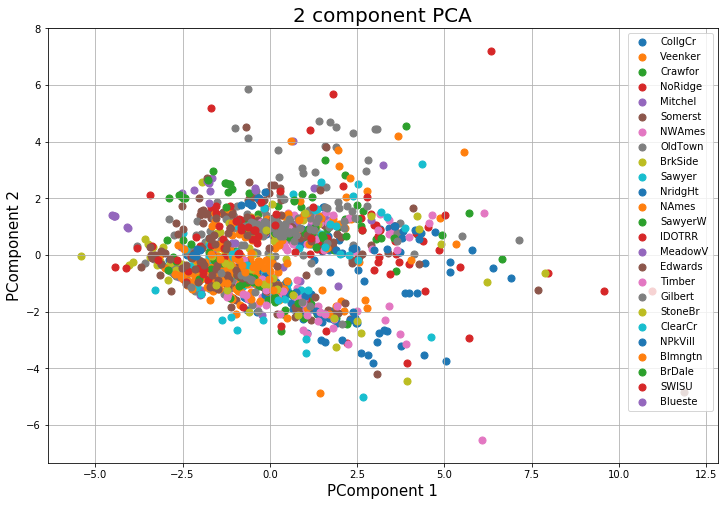

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PComponent 1', fontsize = 15)
ax.set_ylabel('PComponent 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(data.Neighborhood.unique())
colors = targets

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Neighborhood'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PComponent 1']
               , finalDf.loc[indicesToKeep, 'PComponent 2']
               , s = 50)
ax.legend(targets)
ax.grid()

### Resultado del PCA

Aparentemente todos los barrios comparten una cierta correlación entre sus dos Componentes principales.

---


# 3 - Probabilidades

Que probabilidad existe de que una casa tenga más de 2 habitaciones siendo que esta se encuentra en cada uno de los barrios del DataSet



![alt Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/8a87804ed5e474f501fe418a2aeaf6ec9fda9214 "Formula")


Debajo Se detallara la probabilidad de cada barrio

In [24]:
# Calcular probabilidad condicionada

def probabilidad(v_neighborhood):
    # Probabilidad de A
    a = data.BedroomAbvGr[data.BedroomAbvGr > 2].value_counts().sum()
    # Probabilidad de B
    b = data.BedroomAbvGr[(data.BedroomAbvGr > 2) & 
                            (data.Neighborhood == v_neighborhood)].value_counts().sum()

    # Calculo de probabilidad condicionada
    prob = (b/a)*100

    return prob

In [25]:
prob_dic = {'Neighborhood': [], 'Probability': []}

In [26]:
# Lista de barrios
tot_neighborhood = list(data.Neighborhood.unique())

# Parse lista de barrios y asigna los valores al diccionario prob_dic
for x in tot_neighborhood:
    prob_dic['Neighborhood'].append(x)
    prob_dic['Probability'].append(probabilidad(x))

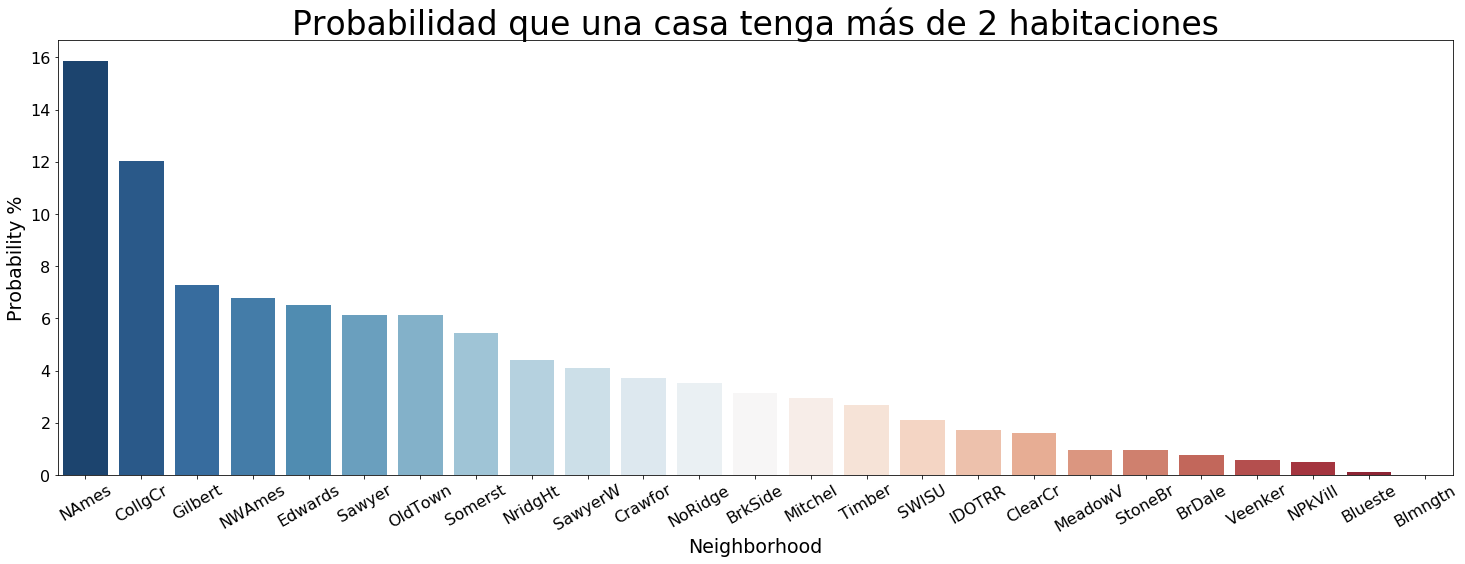

In [129]:
# Print BarPlot
plt.figure(figsize=(25, 8))
mean_pn = sns.barplot(x="Neighborhood", y="Probability", data=pd.DataFrame(prob_dic).sort_values(by='Probability',ascending=False), palette='RdBu_r')
mean_pn.axes.set_title("Probabilidad que una casa tenga más de 2 habitaciones",fontsize=33)
mean_pn.set_xlabel("Neighborhood",fontsize=19)
mean_pn.set_ylabel("Probability %",fontsize=19)
mean_pn.tick_params(labelsize=16)
mean_pn.set_xticklabels(mean_pn.get_xticklabels(), rotation=30)
plt.show()